In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
from sys import path
path.append('./../spineSimulator/')
#import spineSimulator
import FiniteDifferenceSolver
import plot
from importlib import reload
reload(FiniteDifferenceSolver)
reload(plot)

<module 'plot' from '/home/work/Projects/spineCableSimulation/code/notebooks/./../spineSimulator/plot.py'>

# simulation parameters, grid and spine size

In [3]:
# x-grid
L = 1.e-6
nh, nhnj, nn, nndj, nd = 4, 1, 4, 1, 4
nx = nh + nhnj + nn + nndj + nd
x = np.linspace(0,L,nx)

# t-grid
T = 0.01e-3
timestep = 100.e-12  # use 100 picoseconds for explicit solver
nt = int(T/timestep)
t = np.linspace(0., T, nt+1)
print('timesteps {nt}'.format(nt=nt))

# spine shape
ah, an, ad = 250.e-9, 50.e-9, 400.e-9 
a = np.zeros(nx)
a[:nh]=ah
a[nh+nhnj:nh+nhnj+nn] = an
a[nh+nhnj+nn+nndj: nh+nhnj+nn+nndj+nd] = ad
a[nh:nh+nhnj]= np.linspace(ah, an, nhnj+2, endpoint=True)[1:-1]
a[nh+nhnj+nn : nh+nhnj+nn+nndj] = np.linspace(an, ad, nndj+2, endpoint=True)[1:-1]

timesteps 100000


# Init simulation

In [4]:
reload(FiniteDifferenceSolver)
#results_file = './../simulation_results/FD_10082022_test.pcl'
results_file = './../../simulation_results/test_run'
write_interval = 1.e-7
spine = FiniteDifferenceSolver.FiniteDifferenceSolver(
    t,x,a,
    bnds=[[0., 0.003e-3, 0.006e-3],
          [1500.e-12, 2000.e-12, 2500.e-12],
          [-0.07, -0.07, -0.07]],
    input_type='const',
    file_name=results_file, 
    write_interval=write_interval)

Strength of input current: 150.0 pA
Writing results to file every 1000 steps.
Writing results to file every 1e-07 seconds.
Writing results at 0.0 ms


# estimate stability

In [5]:
print('phi ', spine.phi)
print('c_Na ', spine.c_Na)
print('c_K ', spine.c_K)
print('c_Cl ', spine.c_Cl)
print('\n ################# \n')

print(spine.phi / spine.c_K)
print(spine.h_k('Na') / spine.g_k('Na') )
print(spine.gamma() / spine.delta_k('K') )
print(spine.gamma() / spine.delta_k('K') )
print('\n ################# \n')
##########
# STABILTY ANALYSIS
# all numbers have to be smaller 0.5
# then a stable solution can be expected
print(spine.const_q*spine.a/2*spine.gamma() * spine.g_k('all')*spine.delta_t/spine.delta_x**2)
print(spine.gamma() * spine.h_k('K')*spine.delta_t/spine.delta_x**2)
print(spine.delta_k('K') * spine.g_k('all')*spine.delta_t/spine.delta_x**2)
print(spine.delta_k('K') * spine.h_k('K')*spine.delta_t/spine.delta_x**2)

phi  [-69.98634728 -70.         -70.         -70.         -70.
 -70.         -70.         -70.         -70.         -70.
 -70.         -70.         -70.         -70.         -70.
 -70.        ]
c_Na  [6.11737375 6.022      6.022      6.022      6.022      6.022
 6.022      6.022      6.022      6.022      6.022      6.022
 6.022      6.022      6.022      6.022     ]
c_K  [84.308 84.308 84.308 84.308 84.308 84.308 84.308 84.308 84.308 84.308
 84.308 84.308 84.308 84.308 84.308 84.308]
c_Cl  [6.022 6.022 6.022 6.022 6.022 6.022 6.022 6.022 6.022 6.022 6.022 6.022
 6.022 6.022 6.022 6.022]

 ################# 

[-0.830127   -0.83028894 -0.83028894 -0.83028894 -0.83028894 -0.83028894
 -0.83028894 -0.83028894 -0.83028894 -0.83028894 -0.83028894 -0.83028894
 -0.83028894 -0.83028894 -0.83028894 -0.83028894]


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('float64'), dtype('<U2')) -> None

# Run simulation and write our results

In [6]:
import time
start_time = time.time()
spine.solve()
end_time = time.time()
time_taken = end_time - start_time
time_taken, 'seconds'

Writing results at 9.999999999999999e-05 ms
Writing results at 0.00019999999999999998 ms
Writing results at 0.0003 ms
Writing results at 0.00039999999999999996 ms
Writing results at 0.0005 ms
Writing results at 0.0006 ms
Writing results at 0.0007000000000000001 ms
Writing results at 0.0007999999999999999 ms
Writing results at 0.0009000000000000001 ms
Writing results at 0.001 ms
Writing results at 0.0011 ms
Writing results at 0.0012 ms
Writing results at 0.0013 ms
Writing results at 0.0014000000000000002 ms
Writing results at 0.0015 ms
Writing results at 0.0015999999999999999 ms
Writing results at 0.0017000000000000001 ms
Writing results at 0.0018000000000000002 ms
Writing results at 0.0019 ms
Writing results at 0.002 ms
Writing results at 0.0021000000000000003 ms
Writing results at 0.0022 ms
Writing results at 0.0023 ms
Writing results at 0.0024 ms
Writing results at 0.0025 ms
Writing results at 0.0026 ms
Writing results at 0.0027 ms
Writing results at 0.0028000000000000004 ms
Writing 

(11.974484205245972, 'seconds')

In [7]:
# time for 1 ms simulation in hours
time_taken * 1.e-3 / T / 3600

0.33262456125683254

In [8]:
(spine.c_Na + spine.c_K - spine.c_Cl - spine.c_background) * spine.const_q / spine.capacitance
# U = Q/C

AttributeError: 'FiniteDifferenceSolver' object has no attribute 'capacitance'

In [9]:
spine.phi

array([-65.91644284, -65.93920409, -65.993103  , -66.04100783,
       -66.08705115, -66.15442476, -66.38364057, -67.5207187 ,
       -68.65780322, -69.79491113, -69.90188201, -69.92888592,
       -69.94666441, -69.96444293, -69.98222146, -70.        ])

(101, 16)


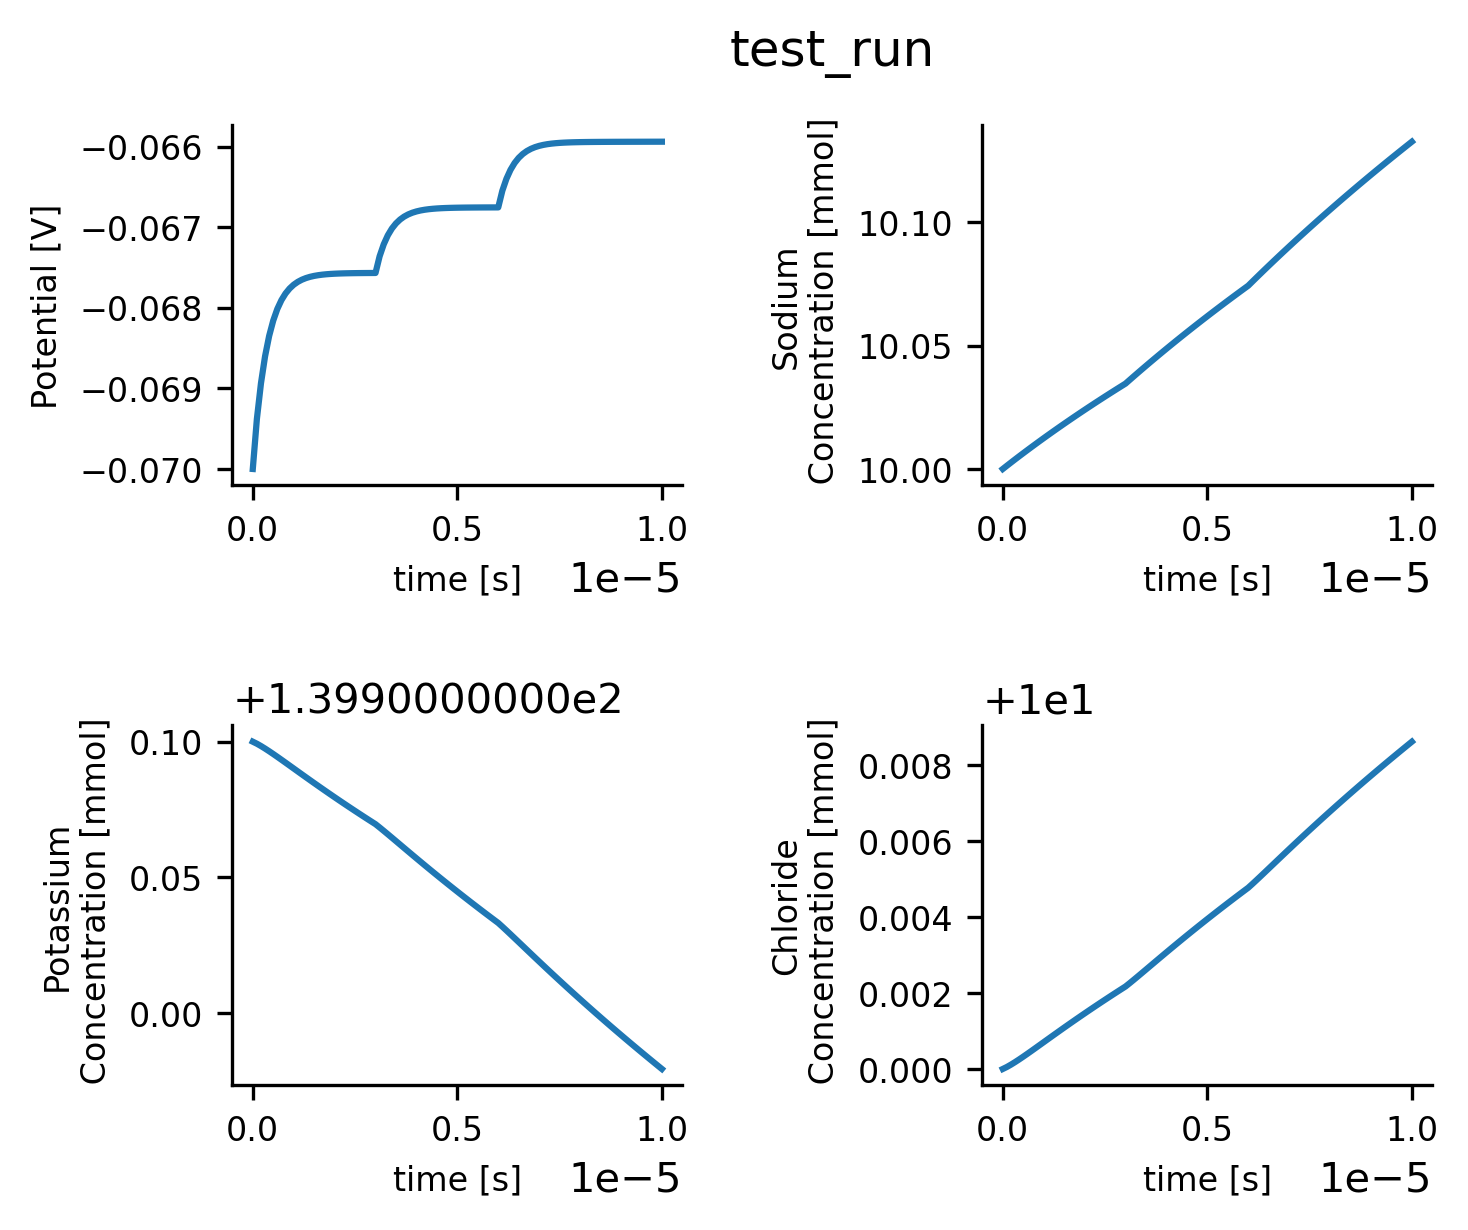

In [10]:
plot.figure_head_overview('test_run')

In [11]:
results = pickle.load(open(results_file, 'rb'))

results = results
t = list(results['data'].keys())
phi = np.array([results['data'][ti]['phi'] for ti in t])
c_Na = np.array([results['data'][ti]['c_Na'] for ti in t])
c_K = np.array([results['data'][ti]['c_K'] for ti in t])
c_Cl = np.array([results['data'][ti]['c_Cl'] for ti in t])
x = spine.x
xx, tt = np.meshgrid(x,t)


fig = plt.figure(dpi=200, figsize=(3,3))
pos = [0.1,0.1,0.8,0.8]
plot.surface(fig, pos, xx, tt, phi)
plt.show()

fig = plt.figure(dpi=200, figsize=(3,3))
pos = [0.1,0.1,0.8,0.8]
plot.surface(fig, pos, xx, tt, c_Na)
plt.show()

reload(plot)
fig = plt.figure(dpi=200, figsize=(3,3))
pos = [0.1,0.1,0.8,0.8]
plot.surface(fig, pos, xx, tt, c_K)
plt.show()

fig = plt.figure(dpi=200, figsize=(3,3))
pos = [0.1,0.1,0.8,0.8]
plot.surface(fig, pos, xx, tt, c_Cl)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './../../simulation_results/test_run'

# Show results

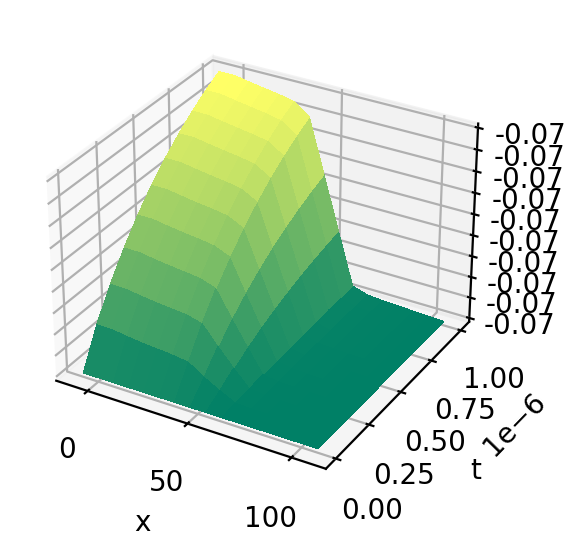

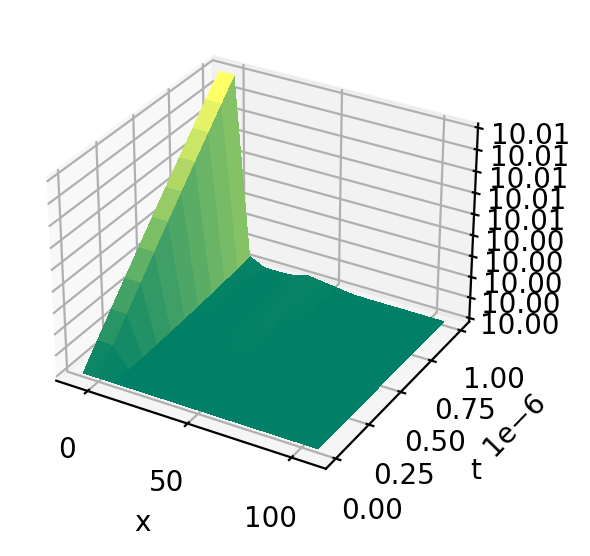

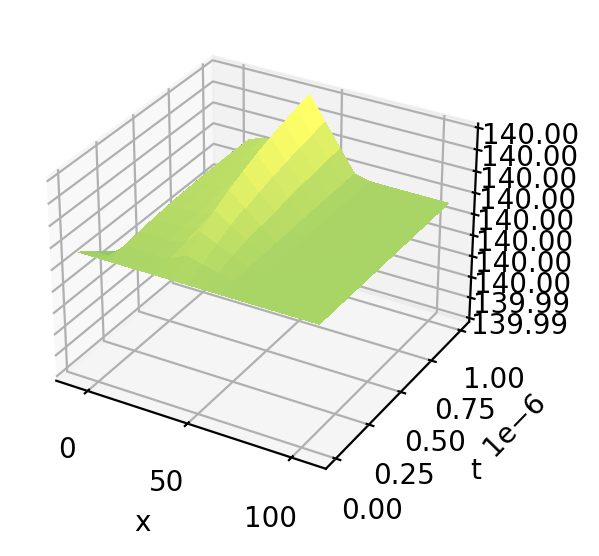

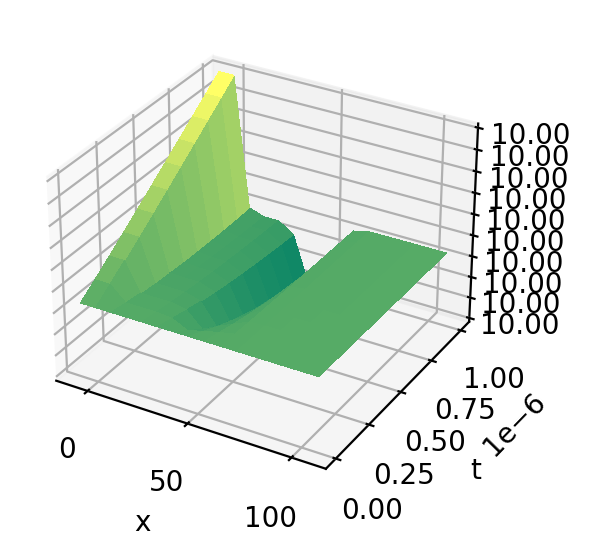

In [31]:

results = pickle.load(open(results_file, 'rb'))

results = results
t = list(results['data'].keys())
phi = np.array([results['data'][ti]['phi'] for ti in t])
c_Na = np.array([results['data'][ti]['c_Na'] for ti in t])
c_K = np.array([results['data'][ti]['c_K'] for ti in t])
c_Cl = np.array([results['data'][ti]['c_Cl'] for ti in t])
x = spine.x
xx, tt = np.meshgrid(x,t)


fig = plt.figure(dpi=200, figsize=(3,3))
pos = [0.1,0.1,0.8,0.8]
plot.surface(fig, pos, xx, tt, phi)
plt.show()

fig = plt.figure(dpi=200, figsize=(3,3))
pos = [0.1,0.1,0.8,0.8]
plot.surface(fig, pos, xx, tt, c_Na)
plt.show()

reload(plot)
fig = plt.figure(dpi=200, figsize=(3,3))
pos = [0.1,0.1,0.8,0.8]
plot.surface(fig, pos, xx, tt, c_K)
plt.show()

fig = plt.figure(dpi=200, figsize=(3,3))
pos = [0.1,0.1,0.8,0.8]
plot.surface(fig, pos, xx, tt, c_Cl)
plt.show()

In [19]:
(spine.c_Na-spine.const_c_Na_rest + spine.c_K-spine.const_c_K_rest - spine.c_Cl+spine.const_c_Cl_rest) * spine.const_q * spine.a / 2. / spine.const_c_m

array([1.39127937, 1.39127937, 1.37193007, 1.35357382, 1.33620595,
       1.31198699, 1.23239537, 0.84203109, 0.45482552, 0.06934054,
       0.03310217, 0.02396778, 0.01796565, 0.01197224, 0.00598467,
       0.        ])

In [166]:
(spine.c_Na-spine.const_c_Na_rest + spine.c_K-spine.const_c_K_rest - spine.c_Cl+spine.const_c_Cl_rest) * spine.const_q * spine.a**2 * np.pi

array([2.38864929e-14, 2.38864929e-14, 2.38123954e-14, 2.36641978e-14,
       2.34418954e-14, 2.32664772e-14, 4.55630872e-15, 3.44520827e-15,
       2.33378928e-15, 1.22206251e-15, 1.22312322e-16, 6.95537537e-16,
       5.56429867e-16, 4.17319115e-16, 2.78217226e-16, 1.39109399e-16,
       0.00000000e+00])

In [167]:
(spine.phi-spine.const_phi_rest) * 2. * np.pi * spine.a * spine.const_c_m

array([2.38864927e-14, 2.38864927e-14, 2.38123953e-14, 2.36641978e-14,
       2.34418953e-14, 2.32664772e-14, 4.55630870e-15, 3.44520827e-15,
       2.33378929e-15, 1.22206251e-15, 1.22312253e-16, 6.95541257e-16,
       5.56434015e-16, 4.17326252e-16, 2.78217985e-16, 1.39109232e-16,
       0.00000000e+00])

In [158]:
(spine.c_Na-spine.const_c_Na_rest + spine.c_K-spine.const_c_K_rest - spine.c_Cl+spine.const_c_Cl_rest) * spine.const_q * spine.a**2 * np.pi

array([2.39000206e-14, 2.39000206e-14, 2.38258349e-14, 2.36774634e-14,
       2.34549041e-14, 2.32792599e-14, 4.55876019e-15, 3.44659298e-15,
       2.33441610e-15, 1.22223016e-15, 1.22313457e-16, 6.95546343e-16,
       5.56437240e-16, 4.17326918e-16, 2.78213070e-16, 1.39104439e-16,
       0.00000000e+00])

In [159]:
(spine.phi-spine.const_phi_rest) * 2. * np.pi * spine.a * spine.const_c_m

array([2.39000205e-14, 2.39000205e-14, 2.38258350e-14, 2.36774634e-14,
       2.34549042e-14, 2.32792599e-14, 4.55876019e-15, 3.44659298e-15,
       2.33441610e-15, 1.22223016e-15, 1.22313458e-16, 6.95546296e-16,
       5.56437040e-16, 4.17327783e-16, 2.78218524e-16, 1.39109263e-16,
       0.00000000e+00])

In [100]:
k_B = 1.381e-23  # Boltzmann constant [k_B] = m^2 kg s^-2 K^-1
e = 1.602e-19  # elementary charge [e] = C
T = 310
k_B * T / e * np.log(6.89803959/ 6.022) 

0.003629523629207271

In [116]:
0.8 * spine.const_q * spine.a / 2. / spine.const_c_m / spine.scale_voltage

array([1.602   , 1.602   , 1.602   , 1.602   , 1.602   , 1.605204,
       0.3204  , 0.3204  , 0.3204  , 0.3204  , 0.323604, 2.5632  ,
       2.5632  , 2.5632  , 2.5632  , 2.5632  , 2.5632  ])